In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2021-02-21 08:26:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   165MB/s    in 0.4s    

2021-02-21 08:26:59 (165 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



# 1. 압축풀기

In [19]:
import os # os 라이브러리를 통해 파일시스템에 접근
import zipfile #zip파일 여는 라이브러리

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp') #tmp폴더 안에 위의 파일을 다시 압축
zip_ref.close()

# 2. 경로 지정하기


In [6]:
# 기본 경로
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train') #os.path.join: 경로를 병합하여 새 경로 생성
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats') #train 데이터 안의 cats -> train_cats_dir 로 지정 : 훈련용
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

/tmp/cats_and_dogs_filtered/train/cats
/tmp/cats_and_dogs_filtered/train/dogs


In [5]:
# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats') #validation_cats_dir 로 지정 : test 용
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/tmp/cats_and_dogs_filtered/validation/cats
/tmp/cats_and_dogs_filtered/validation/dogs


# 3. 데이터셋 살펴보기

In [7]:
#파일이름과 개수
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

#os.listdir : 경로 내에 있는 파일 -> 리스트 형태로 반환

print(train_cat_fnames[:5])
print(train_dog_fnames[:5]) #각각 5개씩 출력

['cat.255.jpg', 'cat.676.jpg', 'cat.259.jpg', 'cat.51.jpg', 'cat.474.jpg']
['dog.930.jpg', 'dog.629.jpg', 'dog.685.jpg', 'dog.569.jpg', 'dog.345.jpg']


In [8]:
# 각 경로에 있는 파일명 리스트 길이( len 함수) -> 파일의 개수 확인 가능
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


# 4. 이미지 확인하기

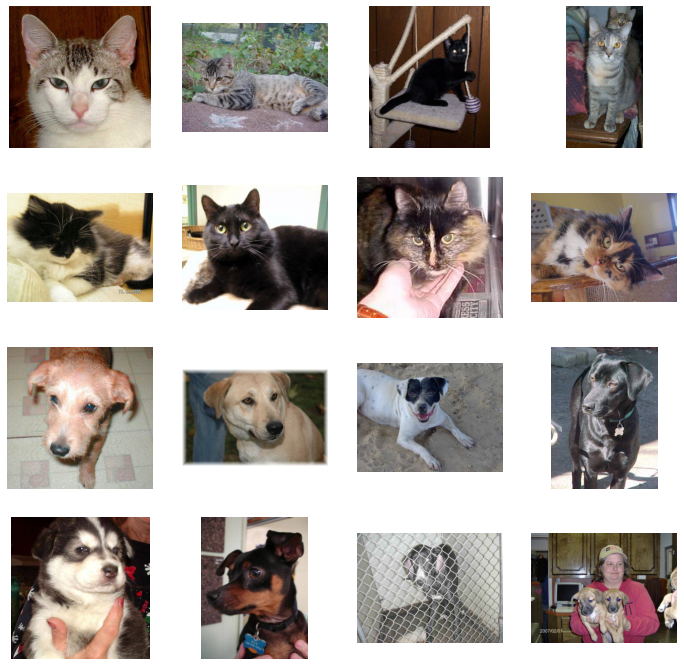

In [9]:
%matplotlib inline
#matplotlib 라이브러리를 이용해서 이미지 출력

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4 #사진들이 4행 4열 크기로 나열됨
pic_index = 0

fig = plt.gcf() #plt.gcf(): 현재 figure에 접근할 때 사용
fig.set_size_inches(ncols*3, nrows*3) #사진의 크기? 

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix): #enumerate : 인덱스 값을 포함하는 객체를 반환
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# 5. 모델 구성하기

In [10]:
#합성곱 신경망의 모델 구성하기

import tensorflow as tf

#channel 은 총 3개 이기때문에 Conv2D 레이어를 3개 만들어줌

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), #1번째 레이어: 필터개수 16개, 활성화함수는 relu, 
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'), # Dense : 은닉층 (512개의 뉴런을 가진 밀집층), 활성화함수: relu -> 몇개의 뉴런을 설정해야 할지는 경험에 의하여 판단이 필요
  tf.keras.layers.Dense(1, activation='sigmoid')  # 여기 dense는 출력층(위의 dense보다 수가 적어야함) 클래스1개에 대한 확률을 예측, 활성화 함수는 시그모이드(뉴런의 출력값을 0과 1사이로 압축)
])

model.summary() #이걸로 신경망 구조 확인 가능

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

# 6. 모델 컴파일하기

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy', #여기서 손실함수로 binary_crossentropy 사용 (개냐 고양이냐 이진 분류이기 때문)
            metrics = ['accuracy'])
#compile : 손실함수(loss function)와 최적화(optimizer) 지정
# 출력층의 활성화 함수: sigmoid -> why? 0과1로 분류되는 binary 분류에 적합
#최적화로는 RMSprop 사용 (훈련과정 중에 학습률을 적절하게 변화시킴)
#손실함수 종류: 다중분류일때는 categorical_crossentropy 등등

# 7. 이미지 데이터 전처리하기

In [12]:
# 훈련 진행 전, ImageDataGenerator로 데이터 전처리 진행
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. ) # 모든 데이터를 255로 나누어줌 (왜 255?)
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir, #flow_from_directory : 훈련돠 테스트에 사용될 이미지 데이터를 만듬
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir, #이미지가 위치한 경로
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150)) #타겟사이즈에 맞춰 이미지의 크기가 조절됨

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 8. 모델 훈련하기

In [13]:
#fit : Neural Network 모델 훈련 
history = model.fit(train_generator, #훈련 데이터셋 입력
                    validation_data=validation_generator, #테스트 데이터셋 입력
                    steps_per_epoch=100, #한번 에포크에서 훈련에 사용할 배치의 개수
                    epochs=100,
                    validation_steps=50, #한번의 에포크 끝날 때, 테스트에 사용되는 배치의 개수
                    verbose=2)

# ->이렇게 훈련을 반복하여 과정 확인

Epoch 1/100
100/100 - 58s - loss: 0.8302 - accuracy: 0.5570 - val_loss: 0.6667 - val_accuracy: 0.6210
Epoch 2/100
100/100 - 57s - loss: 0.6746 - accuracy: 0.6130 - val_loss: 0.6072 - val_accuracy: 0.6740
Epoch 3/100
100/100 - 57s - loss: 0.5981 - accuracy: 0.6825 - val_loss: 0.6381 - val_accuracy: 0.6670
Epoch 4/100
100/100 - 57s - loss: 0.5321 - accuracy: 0.7405 - val_loss: 0.5909 - val_accuracy: 0.7180
Epoch 5/100
100/100 - 57s - loss: 0.4528 - accuracy: 0.7895 - val_loss: 0.6821 - val_accuracy: 0.6660
Epoch 6/100
100/100 - 57s - loss: 0.3586 - accuracy: 0.8450 - val_loss: 0.7147 - val_accuracy: 0.7150
Epoch 7/100
100/100 - 57s - loss: 0.2693 - accuracy: 0.8805 - val_loss: 0.7771 - val_accuracy: 0.7000
Epoch 8/100
100/100 - 58s - loss: 0.1746 - accuracy: 0.9280 - val_loss: 0.9895 - val_accuracy: 0.6920
Epoch 9/100
100/100 - 57s - loss: 0.1443 - accuracy: 0.9500 - val_loss: 0.9880 - val_accuracy: 0.6740
Epoch 10/100
100/100 - 57s - loss: 0.1008 - accuracy: 0.9710 - val_loss: 1.6563 - 

# 9. 정확도와 손실 확인하기

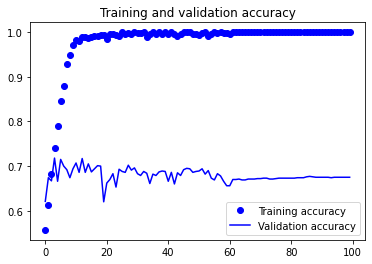

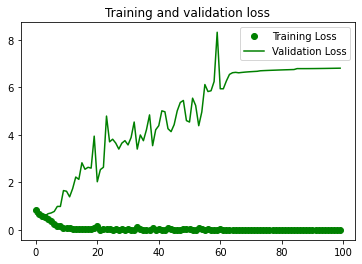

In [14]:
#matplotlib: 훈련과정에서 에포크에 따른 정확도와 손실을 출력

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#10. 테스트 이미지 분류하기

In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving 148.jpg to 148 (1).jpg
[0.]
148.jpg is a cat
